## Exemple 4.1 -  Single Material Elliptical Sections
For this example, five aspect ratios $a/b$ (where $a$ is the semi-major axis and $b$ is the semi-minor axis) between 1 and 5 were considered. Multiple meshes were generated for each combination of ratio and element type, each with an increasing number of elements. The meshes used are categorized in subfolders the ``meshes`` folder by aspect ratio, then by element type. For example, the directory ``meshes/a1/T6`` contains all meshes for the aspect ratio equal to 1 and element type T6.

After running the simulations, to facilitate post-processing, the results were stored as .pkl files in the ``/pkl`` folder using the naming scheme: `{ratio}_{element type}.pkl`. Each file contains four variables: a string indicanting the element type, an array with the numbers of elements, an array containing the calculated values of $J_\phi^h$ and an array with the degrees of freedom of each mesh. Below is the code that reproduces Fig. 3 and Fig. 4 from those results.

#### Grouped by aspect ratio

C:\Users\Carlos Damaia\AppData\Local\Temp\ipykernel_156220\2398908825.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins.set_yticklabels([y1, 1.0])
C:\Users\Carlos Damaia\AppData\Local\Temp\ipykernel_156220\2398908825.py:91: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=.05,hspace=.05)
C:\Users\Carlos Damaia\AppData\Local\Temp\ipykernel_156220\2398908825.py:105: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


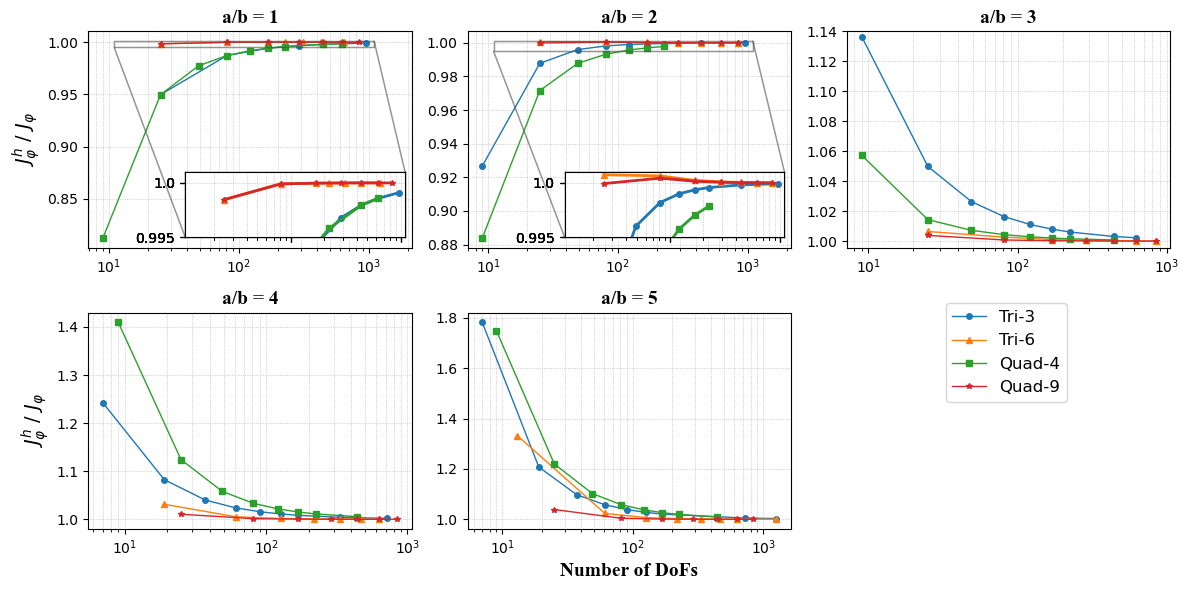

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

ratios      = ['a1','a2','a3','a4','a5']
elemTypes   = ['T3','T6','Q4','Q9']
elemMarkers = ['o','^','s','*']
root        = r'./pkl/'

# Options for title and x_label
labelKwargs = dict(fontweight='bold',fontsize=14,fontname='Times New Roman')

# Create figure and subplots
fig, axes = plt.subplots(figsize=[12, 6], ncols=3, nrows=2, layout='constrained')

## Loop through ratios
for k,ratio in enumerate(ratios):
    # Define axes for current ratio
    ax = axes[k//3, k%3]

    ## Loop through element types
    for i,elemType in enumerate(elemTypes):
        # Name of the pkl file
        name = ratio + '_' + elemType + '.pkl'
        # Path of the pkl file
        path = root + '\\' + name
        # Ratio
        a    = int(ratio[-1])

        # Opens the pkl file
        with open(path, 'rb') as file:
            label       = pickle.load(file)
            elements    = pickle.load(file)
            j_phi_h     = pickle.load(file)
            dofs        = pickle.load(file)

            # Calulate analytical value of the torsional constant
            if a == 1:
                # Circle
                r = 1
                J_analytical = np.pi*r**4/2
            else:
                # Ellipse
                b = 1
                J_analytical = np.pi*a**3*b**3/(a**2+b**2)

            ax.semilogx(dofs,j_phi_h/J_analytical,marker=elemMarkers[i],label=label,linewidth=1,ls='-',ms=4)
            ax.grid(which='both', ls=':',   lw=.5); 
            ax.set_title('a/b = ' + str(a),**labelKwargs)
            
            ## Labels (in each subplot)
            # ax.set_xlabel('Nº of DOFs',**labelKwargs)
            # ax.set_ylabel(r'$\dfrac{J_{\varphi}^h}{J_{\varphi}}  $',**labelKwargs)
            
            # Custom ticks for subplot a/b = 3
            if a == 3:
                ax.set_ylim(top=1.14)
                ax.set_yticks(np.arange(1,1.16,0.02))
                # ax.set_xlim([6,1000])


        #  ---------------------------------------------------------
        #  Apply zoom insert to first and second figures
        if ratio in ratios[:2]:
            ## Axes for zoom
            axins = ax.inset_axes([.3, .05, 0.68, 0.3])
            for line in ax.get_lines():
                axins.semilogx(line.get_xdata(), line.get_ydata(),marker=line.get_marker(),linewidth=2,ms=4,ls='-')
            axins.grid(which='both', ls=':', lw=.5)

            # subregion of the original image
            x1, x2, y1, y2 = 11, 1100, .995, 1.001
            axins.set_xlim(x1, x2)
            axins.set_ylim(y1, y2)
            axins.set_xticklabels([])
            axins.set_yticklabels([y1, 1.0])

            # Indicating zoom insert
            ax.indicate_inset_zoom(axins, edgecolor=[.3,.3,.3], alpha=.2)
        #  -----------------------------------------------------------

    # Save image
    # plt.savefig('a_b = ' + str(a) + '.svg')

# Adjustments for subplot spacing
fig.subplots_adjust(wspace=.05,hspace=.05)
fig.delaxes(axes[1,2])

# Labels (entire figure)
axes[1,1].set_xlabel('Number of DoFs',**labelKwargs)
axes[0,0].set_ylabel(r'$J_{\varphi}^h ~/~ J_{\varphi}  $',**labelKwargs)
axes[1,0].set_ylabel(r'$J_{\varphi}^h ~/~ J_{\varphi}  $',**labelKwargs)


# Legend
lines = axes[0,0].get_lines()
fig.legend(fontsize=12,bbox_to_anchor=(0.9, 0.5), handles=lines)
# fig.legend(fontsize=12,loc='outside center right', handles=lines)

fig.tight_layout()

#### Grouped by element type

C:\Users\Carlos Damaia\AppData\Local\Temp\ipykernel_156220\467171763.py:59: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=.07)


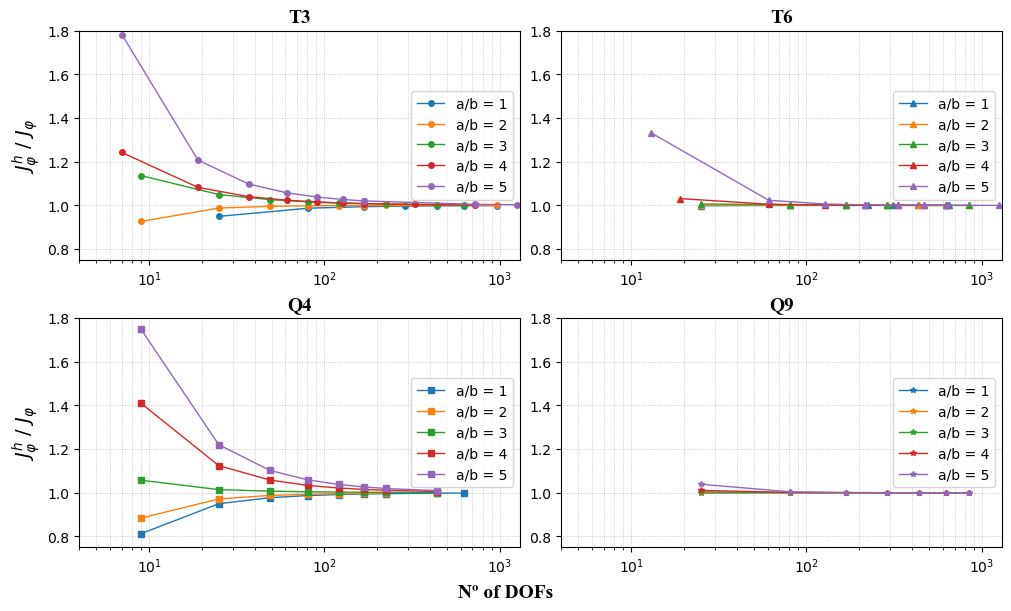

In [2]:
# Options for title and x_label
labelKwargs = dict(fontweight='bold',fontsize=14,fontname='Times New Roman')

# Create figure and subplots
fig, axes = plt.subplots(figsize=[10, 6], ncols=2, nrows=2, layout='constrained')

## Loop through element types
for i,elemType in enumerate(elemTypes):
    # Define axes for current ratio
    ax = axes[i//2, i%2]

    ## Loop through ratios
    for j,ratio in enumerate(ratios):
        # Name of the pkl file
        name = ratio + '_' + elemType + '.pkl'
        # Path of the pkl file
        path = root + '\\' + name
        # Ratio
        a    = int(ratio[-1])

        # Opens the pkl file
        with open(path, 'rb') as file:
            label       = pickle.load(file)
            elements    = pickle.load(file)
            j_phi_h     = pickle.load(file)
            dofs        = pickle.load(file)

            # Calulate analytical value of the torsional constant
            if a == 1:
                # Circle
                r = 1
                J_analytical = np.pi*r**4/2
            else:
                # Ellipse
                b = 1
                J_analytical = np.pi*a**3*b**3/(a**2+b**2)

            ax.semilogx(dofs,j_phi_h/J_analytical,marker=elemMarkers[i],label=f'a/b = {a}',linewidth=1,ls='-',ms=4)
            ax.grid(which='both', ls=':',   lw=.5); 
            ax.set_title(elemTypes[i],**labelKwargs)
            
            ## Labels (in each subplot)
            # ax.set_xlabel('Nº of DOFs',**labelKwargs)
            # ax.set_ylabel(r'$\dfrac{J_{\varphi}^h}{J_{\varphi}}  $',**labelKwargs)
            
            ax.set_xlim((4,1300))
            ax.set_ylim((0.75,1.8))
            
            ax.legend(loc='center right')

    # Save image
    # plt.savefig('a_b = ' + str(a) + '.svg')


axes[0,0].set_ylabel(r'$J_{\varphi}^h~/~J_{\varphi}$', fontsize=14)
axes[1,0].set_ylabel(r'$J_{\varphi}^h~/~J_{\varphi}$', fontsize=14)
lines = axes[0,0].lines
fig.supxlabel('Nº of DOFs',**labelKwargs)
fig.subplots_adjust(wspace=.07)

## 